<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time Series Analysis</a></span></li><li><span><a href="#Stationarity-of-Time-Series" data-toc-modified-id="Stationarity-of-Time-Series-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stationarity of Time Series</a></span></li><li><span><a href="#Trend-and-Seasonality" data-toc-modified-id="Trend-and-Seasonality-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Trend and Seasonality</a></span></li><li><span><a href="#Forecasting-Time-Series" data-toc-modified-id="Forecasting-Time-Series-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Forecasting Time Series</a></span><ul class="toc-item"><li><span><a href="#SARIMA-(Seasonal-Autoregressive-Integrated-Moving-Average)" data-toc-modified-id="SARIMA-(Seasonal-Autoregressive-Integrated-Moving-Average)-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>SARIMA (Seasonal Autoregressive Integrated Moving Average)</a></span><ul class="toc-item"><li><span><a href="#Hyperparamter-tuning-for-the-model" data-toc-modified-id="Hyperparamter-tuning-for-the-model-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Hyperparamter tuning for the model</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Get-Prediction-+-True-Data" data-toc-modified-id="Get-Prediction-+-True-Data-2.4.1.3"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>Get Prediction + True Data</a></span></li><li><span><a href="#Prediction-of-Sales-10-weeks-later-of-the-last-date-+-Confidence-Interval" data-toc-modified-id="Prediction-of-Sales-10-weeks-later-of-the-last-date-+-Confidence-Interval-2.4.1.4"><span class="toc-item-num">2.4.1.4&nbsp;&nbsp;</span>Prediction of Sales 10 weeks later of the last date + Confidence Interval</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import math
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Superstore_Sales_Dataset.csv', encoding='latin1', parse_dates=['Order Date'])
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [3]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
data.shape

(9800, 18)

# Exploratory Data Analysis

In [5]:
data['Order Date'][0]

Timestamp('2017-08-11 00:00:00')

In [6]:
for i in range(data.shape[0]):
    data['Order Date'][i] = pd.to_datetime(data['Order Date'][i], errors='coerce').date()

# Sort Date column
data = data.sort_values(by='Order Date')
data = data.set_index(pd.DatetimeIndex(data['Order Date']))

In [7]:
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

In [8]:
data.head(2).append(data.tail(2))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day,Month,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,541,CA-2015-140795,2015-01-02,03/02/2015,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,...,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,2,1,2015
2015-01-03,5714,US-2015-143707,2015-01-03,05/03/2015,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,...,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,3,1,2015
2018-12-30,907,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,30,12,2018
2018-12-30,1298,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,30,12,2018


In [9]:
def detailed(data):
    ddata = pd.DataFrame(index=['total', '% missing' , 'data Type', 'range'])
    
    for cols in data.columns:
        size = data[cols].size
        pnul=round(data[cols].isna().sum()/size,2)
        nul_val = f"{pnul*100}% - {data[cols].isna().sum()}/{size}"
        dtype = 'categorical' if data[cols].dtype == object else 'Numerical' 
        rng = f"{len(data[cols].unique())} labels"\
        if dtype == 'categorical' else\
        f"{round(data[cols].min(),2)}-{round(data[cols].max(),2)}"
        ddata[cols] = [size,nul_val,dtype,rng]
    return ddata

detailed(data)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day,Month,Year
total,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,...,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
% missing,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,...,0.0% - 11/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800,0.0% - 0/9800
data Type,Numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,Numerical,categorical,categorical,categorical,categorical,categorical,Numerical,Numerical,Numerical,Numerical
range,1-9800,4922 labels,1230 labels,1326 labels,4 labels,793 labels,793 labels,3 labels,1 labels,529 labels,...,1040.0-99301.0,4 labels,1861 labels,3 labels,17 labels,1849 labels,0.44-22638.48,1-31,1-12,2015-2018


In [10]:
data.describe()

,Row ID,Postal Code,Sales,Day,Month,Year
count,9800.000000,9789.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,16.119184,7.186122,2016.724184
std,2829.160653,32041.223413,626.651875,8.073122,3.424108,1.123984
min,1.000000,1040.000000,0.444000,1.000000,1.000000,2015.000000
25%,2450.750000,23223.000000,17.248000,10.000000,4.000000,2016.000000
50%,4900.500000,58103.000000,54.490000,16.000000,8.000000,2017.000000
75%,7350.250000,90008.000000,210.605000,23.000000,10.000000,2018.000000
max,9800.000000,99301.000000,22638.480000,31.000000,12.000000,2018.000000


In [11]:
# Look for null values if any
pd.DataFrame(data.isnull().sum())

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Important columns do not have any null value hence it is fine.<br>
Now lets look at the distribution of numerical variables

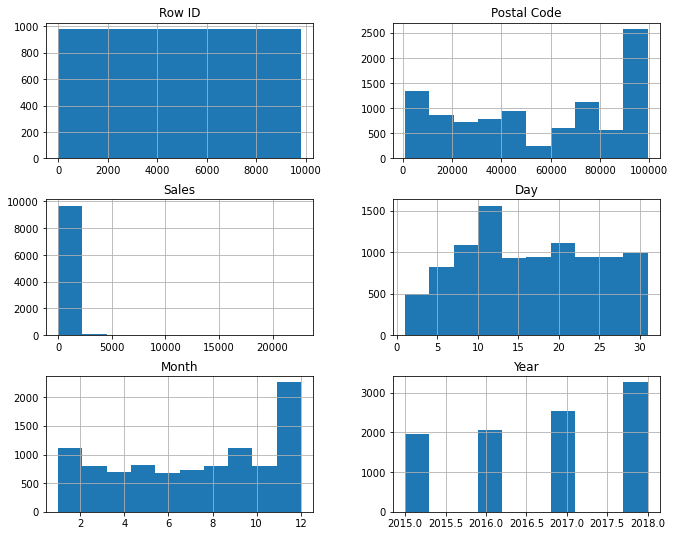

In [12]:
fg, ax = plt.subplots(figsize=(11, 9))
data.hist(ax=ax)
plt.show()

Correlation Analysis

<AxesSubplot:>

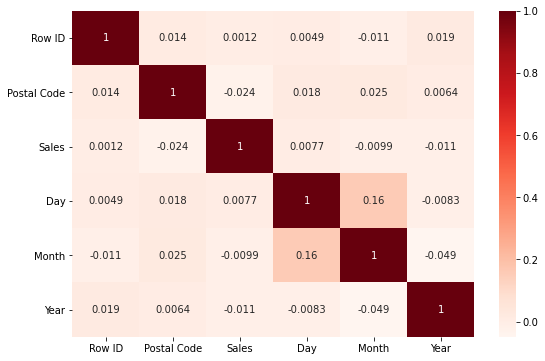

In [13]:
fg, ax = plt.subplots(figsize=(9,6))
sns.heatmap(data.corr(), cmap='Reds', annot=True, ax=ax)

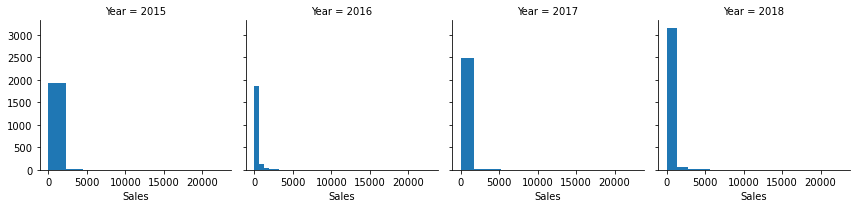

In [14]:
fg=sns.FacetGrid(data, col='Year')
fg.map(plt.hist, 'Sales')

Monthly Revenue in All Years

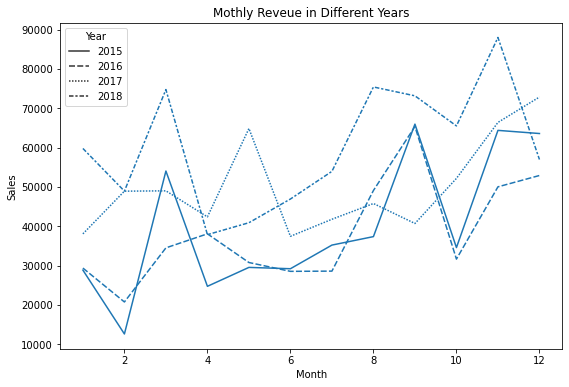

In [15]:
mothly_reveue=data.groupby(['Year','Month'])['Sales'].sum().reset_index()
fg, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x='Month',y='Sales',style='Year',data=mothly_reveue, ax=ax)
plt.title('Mothly Reveue in Different Years')
plt.show()

# Time Series Analysis

## Time Series Analysis

For time series analysis, we will consider 4 components of this industry namely: Classic Cars, Vintage Cars, Motorcycles, and Planes. Downsampling of data is done from days to weeks in order to understand the trend more clearly.

In [16]:
pd.plotting.register_matplotlib_converters()

<AxesSubplot:xlabel='Order Date'>

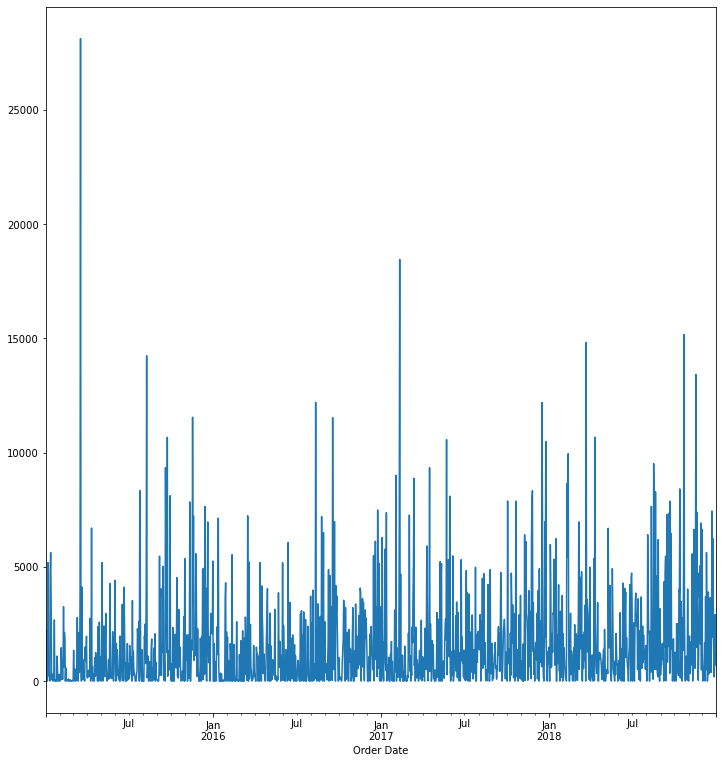

In [17]:
# Converting to float
data['Sales'] = data['Sales'] * 1.0

sales_Sales = data['Sales']

f, (ax1) = plt.subplots(1, figsize=(12, 13))

sales_Sales.resample('D').sum().plot(ax = ax1)

## Stationarity of Time Series

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time.<br>

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)

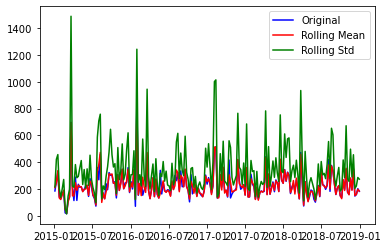

Results of Dickey-Fuller Test:
ADF Statistic: -43.574384
p-value: 0.000000
Critical Values:
1% -3.43101779117503
5% -2.8618351232954256
10% -2.566927089002447


In [20]:
# Testing stationarity of Sales
test_stationarity(sales_Sales)

The p-value is quite low, Rolling mean is quit inline with orignal mean, and also the rolling std is quite low and constant hence we can say that forecasting can be done on the data without any further transformations.

## Trend and Seasonality

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
# Plotting seasonality and trend
def plot_timeseries(sales):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

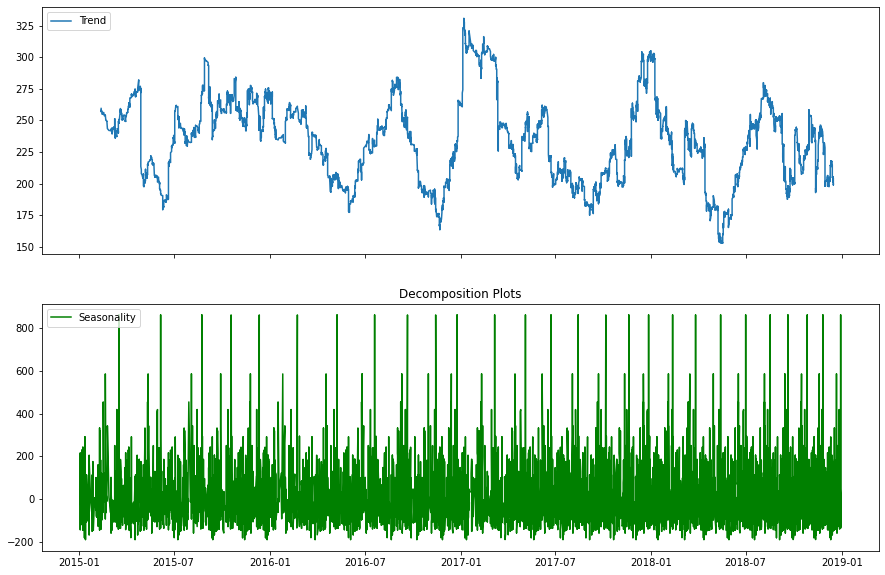

In [23]:
# Plotting seasonality and trend for Sales
plot_timeseries(sales_Sales)

## Forecasting Time Series

### SARIMA (Seasonal Autoregressive Integrated Moving Average)

<AxesSubplot:xlabel='Order Date'>

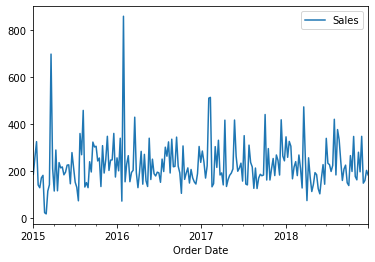

In [24]:
# resampling daywise
data_sarima = data.resample('W').mean()
#data_sarima = data_sarima.fillna(data_sarima['Sales'].mean())
data_sarima = data_sarima[['Sales']]
data_sarima.plot()

#### Hyperparamter tuning for the model

p, q, and d values are needed found out using gridsearch to get the lowest AIC score

In [25]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(data_sarima,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2886.678363848563
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2623.8289287113594
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2518.8338764104556
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2243.8502079302552
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2512.8127264305776
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2407.9134719474177
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2311.3944498781684
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2236.100038138513
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2772.2796414346703
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2566.5766342397646
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2507.0244773895747
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2234.001804548282
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2514.7322514609614
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2397.0031608078134
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2312.294078840114
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2224.6250257528113
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2658.4491745401037
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2485.7867820689

The hyperparameters chosen are - ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2221.043516365857

#### Fitting the model

In [28]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(data_sarima,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1159      0.071     -1.632      0.103      -0.255       0.023
ma.L1         -1.0000     84.121     -0.012      0.991    -165.875     163.875
ar.S.L12      -0.1929      0.084     -2.305      0.021      -0.357      -0.029
ma.S.L12      -0.9999     84.153     -0.012      0.991    -165.938     163.938
sigma2      8916.2006      0.006   1.49e+06      0.000    8916.189    8916.212


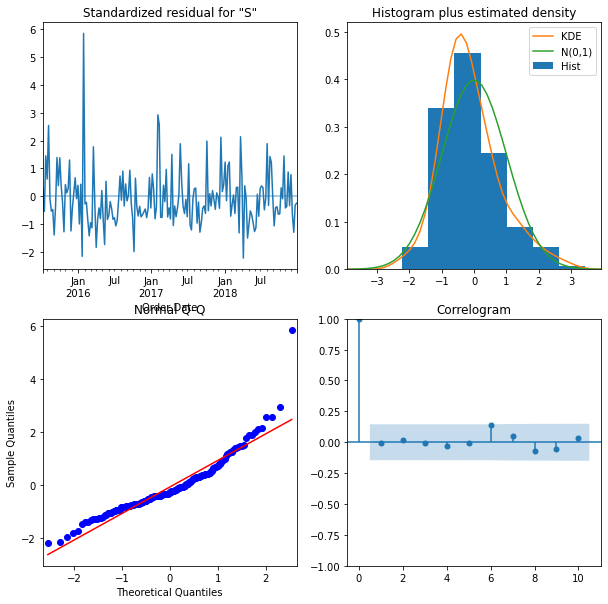

In [29]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

#### Get Prediction + True Data

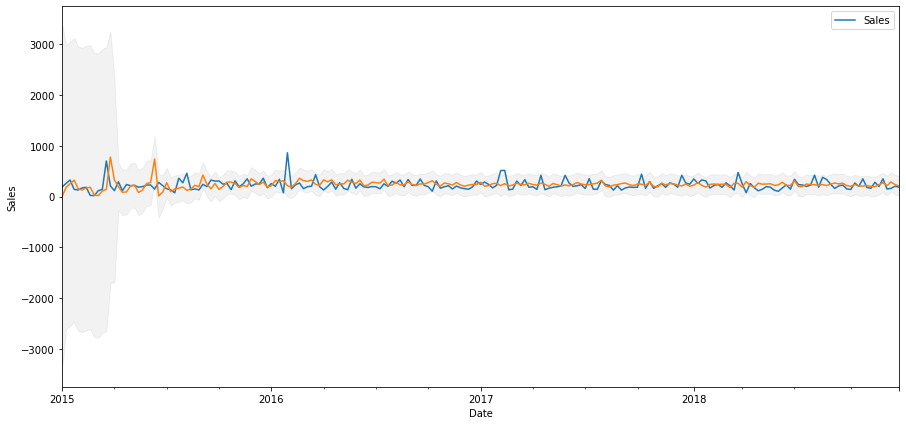

Root Mean Squared Error:  127.56066771821465


In [50]:
pred = results_sarima.get_prediction(start=pd.to_datetime('2015-01-04'), dynamic = False) 

pred_ci = pred.conf_int() 

ax = data_sarima["2015":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

data_sarima_forecasted = pred.predicted_mean
data_sarima_truth = data_sarima["2015-01-04":]

#print(data_sarima_truth)
# # Calculating the error
rms_sarima = math.sqrt(mean_squared_error(data_sarima_truth, data_sarima_forecasted))
print("Root Mean Squared Error: ", rms_sarima)

In [54]:
pred_summ = pred.summary_frame(alpha=0.05)

In [57]:
pred_summ[-5:]

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
Order Date,,,,
2018-12-02,271.732703,98.124716,79.411794,464.053612
2018-12-09,213.104393,98.076888,20.877225,405.331562
2018-12-16,286.694192,98.041035,94.537294,478.851089
2018-12-23,234.224189,98.027251,42.094307,426.354070
2018-12-30,207.733290,98.015239,15.626950,399.839629


In [42]:
data_sarima_truth

,Sales
Order Date,
2018-07-01,339.270376
2018-07-08,233.029107
2018-07-15,227.042150
2018-07-22,198.114636
2018-07-29,223.694930
2018-08-05,420.544485
2018-08-12,183.257634
2018-08-19,376.653458
2018-08-26,333.262435


#### Prediction of Sales 10 weeks later of the last date + Confidence Interval

In [11]:
forecast = loaded_model.forecast(steps=10) # making a forecast of 10 weeks later of the last date in the 'ORDERDATE' column
print(forecast) #displays the sales forecast as type integer

2019-01-06    220.735779
2019-01-13    213.896778
2019-01-20    225.529842
2019-01-27    229.443526
2019-02-03    228.878537
2019-02-10    205.035438
2019-02-17    243.168948
2019-02-24    232.418775
2019-03-03    225.720009
2019-03-10    281.065613
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [12]:
forecast2 = loaded_model.get_forecast(steps=10)
df_forecast2 = forecast2.summary_frame(alpha=0.05)

In [13]:
df_forecast2

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-06,220.735779,98.003717,28.652024,412.819534
2019-01-13,213.896778,98.484400,20.870901,406.922655
2019-01-20,225.529842,98.510932,32.451964,418.607720
2019-01-27,229.443526,98.509263,36.368918,422.518133
2019-02-03,228.878537,98.510357,35.801785,421.955289
2019-02-10,205.035438,98.513222,11.953071,398.117804
2019-02-17,243.168948,98.518013,50.077190,436.260705
2019-02-24,232.418775,98.484203,39.393284,425.444266
2019-03-03,225.720009,98.446552,32.768312,418.671706
2019-03-10,281.065613,98.420791,88.164408,473.966818


In [32]:
df_forecast2.mean_ci_upper.values

array([412.8195341 , 406.9226551 , 418.60771952, 422.51813322,
       421.95528872, 398.11780403, 436.26070503, 425.44426572,
       418.67170597, 473.96681804])

In [44]:
#save Model
# results_sarima.save('model_superstore_sales.pkl')

In [10]:
#Load Model
# with open('model_superstore_sales.pkl', 'rb') as file:  
#     loaded_model = pickle.load(file)

In [10]:
data_sarima['Date'] = data_sarima.index

In [11]:
data_sarima.reset_index(inplace=True)
data_sarima.drop(['Order Date'], axis=1, inplace=True)

In [12]:
data_sarima

,Sales,Date
0,186.129267,2015-01-04
1,258.833349,2015-01-11
2,325.164100,2015-01-18
3,140.570182,2015-01-25
4,128.688375,2015-02-01
...,...,...
204,347.823548,2018-12-02
205,148.198816,2018-12-09
206,159.337303,2018-12-16
207,202.677792,2018-12-23


In [16]:
new_order = [1, 0]
data_sarima = data_sarima[data_sarima.columns[new_order]]

In [17]:
data_sarima

,Date,Sales
0,2015-01-04,186.129267
1,2015-01-11,258.833349
2,2015-01-18,325.164100
3,2015-01-25,140.570182
4,2015-02-01,128.688375
...,...,...
204,2018-12-02,347.823548
205,2018-12-09,148.198816
206,2018-12-16,159.337303
207,2018-12-23,202.677792
